# Data Exploration and Understanding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

## Inspecting the Data

In [2]:
IMAGE_PATH = 'image_chips_native'
LABEL_PATH = 'labels/labels_native'
PATH = os.getcwd()

images = os.listdir(IMAGE_PATH)
labels = os.listdir(LABEL_PATH)

print(f'Image counts: {len(images)}')
print(f'Label counts: {len(labels)}')

Image counts: 2553
Label counts: 2542


As we can see above, there's a mismatch in the count of images and labels. Perhaps some images don't have any solar panel objects? Let us confirm this.

In [3]:
no_label_cnt = 0
for i in images:
    filename = i[:-4] + '.txt'
    if filename not in labels:
        print(f'{filename} does not have a label')
        no_label_cnt += 1

print(f'{no_label_cnt} images do not have labels')

solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7962_y0_8558_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7934_y0_8341_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7986_y0_11313_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7958_y0_8403_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7957_y0_8387_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7934_y0_8347_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7937_y0_11298_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7997_y0_10765_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7_y0_6959_dxdy_416(1).txt does not have a label
solarpanels_native_1__x0_7999_y0_8765_dxdy_416(1).txt does not have a label
11 images do not have labels


Let us also check if some labels do not have corresponding images.

In [4]:
no_image_cnt = 0
for i in labels:
    filename = i[:-4] + '.tif'
    if filename not in images:
        print(f'{filename} does not have an image')
        no_image_cnt += 1

print(f'{no_image_cnt} labels do not have images')

0 labels do not have images


An interesting observation is that all solar panels without labels end with (1), which indicates that these are duplicate filenames. Let us see if there are corresponding images without the (1) suffix.

In [5]:
for i in images:
    filename = i[:-4]
    if filename[-3:] == '(1)':
        original_filename = filename[:-3] + '.tif'
        print(f'Image has original filename: {original_filename in images}')

Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True
Image has original filename: True


All of them do! We can safely remove the duplicate files now.

In [6]:
for i in images:
    filename = i[:-4]
    if filename[-3:] == '(1)':
        print(f'Removing {os.path.join(PATH, IMAGE_PATH, i)}')
        os.remove(os.path.join(PATH, IMAGE_PATH, i))

Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7962_y0_8558_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7934_y0_8341_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7986_y0_11313_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7958_y0_8403_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7957_y0_8387_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7934_y0_8347_dxdy_416(1).tif
Removing /home/nishuz/Desktop/College/SRIP/Selection/image_chips_native/solarpanels_native_1__x0_7937_y0_11298_dxdy_

## 1. Dataset Statistics

### a. How many instances of solar panels are present in the dataset?

To answer this question, we simply need to sum up the number of rows in each file, since each row corresponds to an instance of a solar panel.

In [7]:
solar_panel_count = 0

for label in labels:
    filepath = os.path.join(PATH, LABEL_PATH, label)
    with open(filepath) as f:
        solar_panel_count += len(f.readlines())

print(f'There are {solar_panel_count} instances of solar panels.')

There are 29625 instances of solar panels.


### b. Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.

To compute and show the value counts of labels per image, we can work with a similar approach. In each label file, each row corresponds to a label. We can maintain a dictionary that stores the number of files with a certain number of labels.

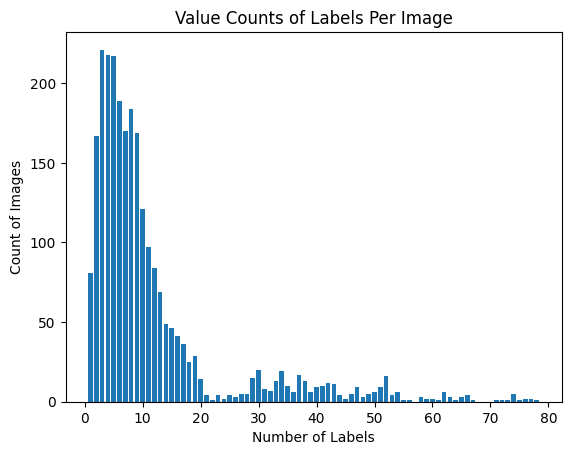

In [8]:
value_counts = {}

for label in labels:
    filepath = os.path.join(PATH, LABEL_PATH, label)
    with open(filepath) as f:
        label_count = len(f.readlines())
        value_counts[label_count] = value_counts.get(label_count, 0) + 1

num_labels = sorted(value_counts.keys())
values = [value_counts[k] for k in num_labels]

plt.bar(num_labels, values)
plt.xlabel('Number of Labels')
plt.ylabel('Count of Images')
plt.title('Value Counts of Labels Per Image')
plt.show()

In [9]:
print(num_labels)
print(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 71, 72, 73, 74, 75, 76, 77, 78]
[81, 167, 221, 218, 217, 189, 170, 184, 169, 121, 97, 84, 69, 49, 46, 41, 36, 25, 29, 14, 4, 1, 4, 2, 4, 3, 5, 5, 15, 20, 8, 7, 13, 19, 10, 6, 17, 13, 6, 9, 10, 12, 11, 4, 2, 5, 9, 3, 5, 6, 9, 16, 4, 6, 1, 1, 3, 2, 2, 1, 6, 3, 1, 3, 4, 1, 1, 1, 1, 5, 1, 2, 2, 1]


From the above values, we can infer that most images have 1-10 labels

## 2. Calculate the statistics of the area of solar panels in meters

### a. What method was used to compute the area (in meters) for a single instance?

As a quick sanity check, let us confirm whether every filename beings with "solarpanels_native_" so that we can easily obtain the tile type. 

In [10]:
for label in labels:
    assert label.startswith('solarpanels_native_')

Since the assertions did not throw errors, all filenames are valid and encode a tile type.

The area (in square meters) of a single solar panel is computed using the bounding box dimensions provided in the label files by the below these steps:  

#### 1. Extract Normalized Bounding Box Dimensions
Each label entry contains five values: `category`, `x-center`, `y-center`, `x-width`, and `y-width`.

The `x-width` and `y-width` represent the width and height of the solar panel, normalized by the image chip size.  

- For native resolution labels, the image chip size is 416 x 416 pixels.  
- For HD resolution labels, the image chip size is 832 x 832 pixels.

Since we have been asked in the task explicitly to use 31 cm native resolution images with 416 x 416 sizes, we will disregard HD resolution labels from now.

#### 2. Convert Normalized Dimensions to Pixels
Since width and height are given in a normalized format (ranging from 0 to 1), they must be converted to pixels by multiplying by the chip size.  

- `x-width (pixels) = x-width (normalized) * 416`  
- `y-width (pixels) = y-width (normalized) * 416`  

#### 3. Convert Pixel Dimensions to Meters
Each pixel represents **0.31 meters** in the real world, based on the geotransform provided in the dataset.  

- `x-width (meters) = x-width (pixels) * 0.31`  
- `y-width (meters) = y-width (pixels) * 0.31`  

#### 4. Compute the Area

Since the bounding box forms a rectangle, the area is computed as:  

$$
\text{Area} \ (m^2) = \text{x-width} \ (m) \times \text{y-width} \ (m)
$$  

Reference: [GDAL documentation: Geotransform tutorial](https://gdal.org/en/stable/tutorials/geotransforms_tut.html)

### b. What is the mean area and standard deviation?

In [22]:
areas = []

def solar_panel_area(solar_panel_obj):
    category, x_center, y_center, x_width, y_width = map(float, solar_panel_obj.split())
    x = x_width * 416 * 0.31
    y = y_width * 416 * 0.31
    return x * y

for label in labels:
    filepath = os.path.join(PATH, LABEL_PATH, label)
    with open(filepath) as f:
        areas.extend(solar_panel_area(line) for line in f.readlines())

areas = np.array(areas)

print(f'Mean area: {np.mean(areas)} square meters')
print(f'Standard deviation: {np.std(areas)} square meters')

Mean area: 191.51782786497895 square meters
Standard deviation: 630.7003355500087 square meters


### c. Plot the histogram of areas. What do you observe?

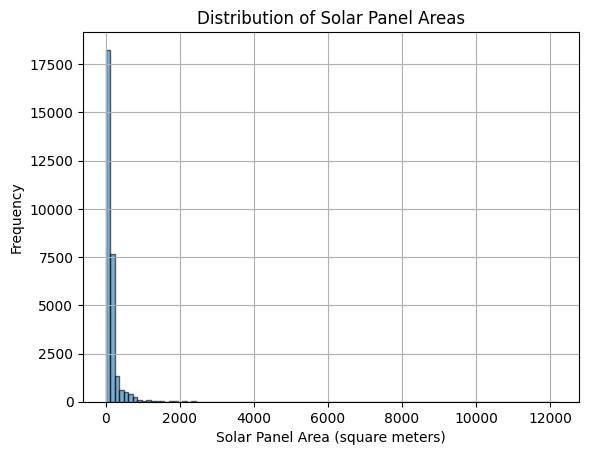

In [31]:
plt.hist(areas, bins=100, edgecolor='black', alpha=0.6)
plt.xlabel('Solar Panel Area (square meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Panel Areas')
plt.grid(True)
plt.show()

In [33]:
print(f'Max area: {np.max(areas)} square meters')

Max area: 12177.407600000002 square meters


From the above histogram, it is clear that most areas are small. However, there is an unusually long tail towards the right, which suggests the presence of extreme outliers. We saw that the average area is ~192 square meters, but as displayed above, the maximum area is 12177 square meters: which is clearly an outlier and is much greater than the mean area.